# Aula 6 - Exercícios - Storytelling
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [162]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
import re
# Importe a biblioteca pandas
import pandas as pd
import numpy as np

### 6.1 Escreva uma função para encontrar numa string todos os grupos de letras em que uma letra a é seguida de 3 letras b. 


In [4]:
def a3b(s):
    """retorne o valor de: n+nn+nnn
    """
    # YOUR CODE HERE
    return re.findall(r'abbb', s)
    raise NotImplementedError()


In [3]:
## Faça seus testes aqui
g = re.findall(r'abbb',  'abbb asde ababbaaabbbabbb')
g

['abbb', 'abbb', 'abbb']

In [5]:
# Validação para nota
assert a3b('abbb asde ababbaaabbbabbb') == ['abbb', 'abbb', 'abbb']

### 6.2 Escreva uma função para retornar os números presentes ao final de uma string. 
#### Retorne uma lista vazia se os ultimos caracteres não forem uma string.


In [23]:
def get_final_numbers(s):
    """retorne True ou False dependendo se a string s contém o
       padrão especificado no enunciado.
    """
    # YOUR CODE HERE
    return re.findall(r'\d+\Z', s)
    raise NotImplementedError()


In [22]:
## Faça seus testes aqui
result1 = re.findall(r'\d+\Z', '33a307a')
result1

[]

In [24]:
# Validação para nota
assert get_final_numbers('33a307a') == []
assert get_final_numbers('33a307') == ['307']

### 6.3 Analise o dataset de curetagem e argumente baseado em dados se o dado da quantidade de procedimentos de curetagem é periódico ou não.
#### Se for periódico, encontre qual o período médio do pico. Elenque possíveis causas desta periodicidade.
#### Faça suas análises em até 4 células


In [123]:
path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df = pd.read_excel(path_curetagem,na_values='-')
df.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)

del df['Total']
df_melt = df.melt(id_vars=['uf'], var_name='data', value_name='qtd')
df_melt

from datetime import datetime
import locale
# Configure o locale para 'pt_BR.UTF-8'
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do mês (de 1 a 12)
df_melt['mes'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').month)
# Crie uma coluna no dataframe df_unpivoted para guardar o valor do ano
df_melt['ano'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b').year)
# Crie uma coluna no dataframe df_unpivoted para guardar a data (em formato datetime)
df_melt['data'] = df_melt['data'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
# Converta a coluna qtd para float
df_melt['qtd'] = df_melt['qtd'].astype(float)

# df_melt.set_index('uf')
df_agg = df_melt[['data','mes','ano','qtd']].groupby(['data','mes','ano']).agg('sum').reset_index()
df_agg

df_agg_mes = df_melt[['mes','qtd']].groupby(['mes']).agg('sum').reset_index()
df_agg_mes
# YOUR CODE HERE
# raise NotImplementedError()

,mes,qtd
0,1,172279.0
1,2,164447.0
2,3,171174.0
3,4,163207.0
4,5,162207.0
5,6,161402.0
6,7,157181.0
7,8,164592.0
8,9,168995.0
9,10,171076.0


O gráfico representa a totalidade dos procedimentos de curetagem realizado pelo Sus. 
O perído médio de pico é de 1 ano, uma vez que é possivel identificar 10 picos para a série de 10 anos


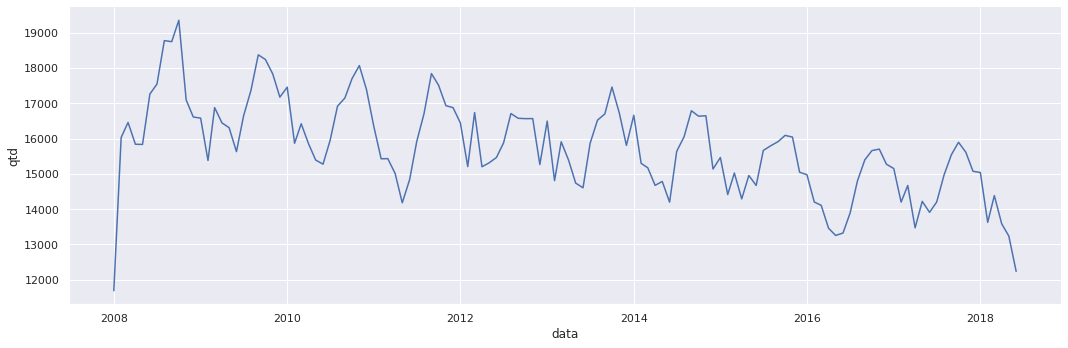

In [132]:
sns.relplot(x="data", y="qtd",  aspect=3,
            kind="line", data=df_agg);
print('O gráfico representa a totalidade dos procedimentos de curetagem realizado pelo Sus. ')
print('O perído médio de pico é de 1 ano, uma vez que é possivel identificar 10 picos para a série de 10 anos')
# YOUR CODE HERE
# raise NotImplementedError()

Somando todos os meses é possível identificar o mês de julho como o de menor incidência e o mes de dezembro em segundo lugar.
Uma possível explicação para esse fato pode estar ligado às ferias escolares dos profissionais de saúde que realzam o procedimento.
a queda relativa em fevereiro pode estar associada ao número de dias(28)


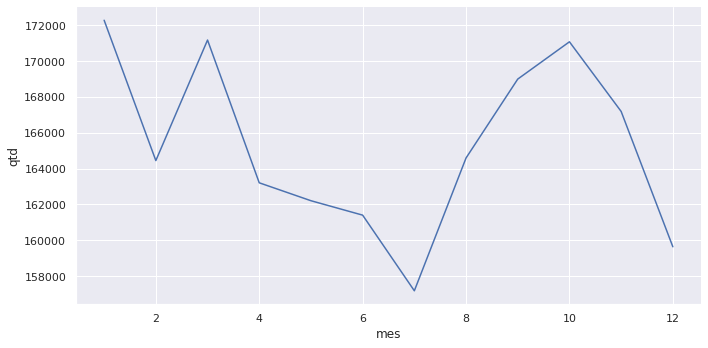

In [135]:
sns.relplot(x="mes", y="qtd",  aspect=2,
            kind="line", data=df_agg_mes);
print('Somando todos os meses é possível identificar o mês de julho como o de menor incidência e o mes de dezembro em segundo lugar.')
print('Uma possível explicação para esse fato pode estar ligado às ferias escolares dos profissionais de saúde que realzam o procedimento.')
print('A queda relativa em fevereiro pode estar associada ao número de dias(28).')
# YOUR CODE HERE
# raise NotImplementedError()

In [136]:

# YOUR CODE HERE
# raise NotImplementedError()

### 6.4 Reescreva em português todos os textos que aparecem no gráfico a seguir. 


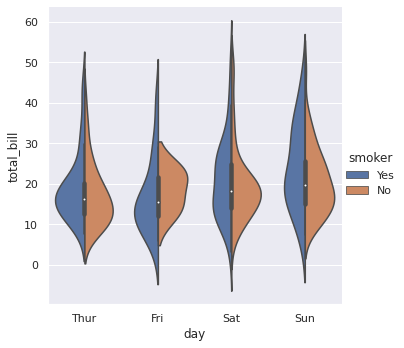

In [25]:
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
tips = sns.load_dataset("tips") 
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

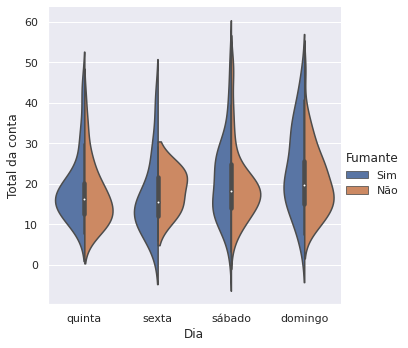

In [156]:
# YOUR CODE HERE
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
tips = sns.load_dataset("tips") 
tips
tips['Fumante'] = tips['smoker'].apply(lambda x: 'Não' if (x == "No") else 'Sim')
g = sns.catplot(x="day", y="total_bill", hue="Fumante",
            kind="violin", split=True, data=tips)
(g.set_axis_labels("Dia", "Total da conta")
  .set_xticklabels(["quinta", "sexta", "sábado", "domingo"]))


### 6.5 Analise o dataset titanic e encontre duas variáveis que tenham relação com a probabilidade de sobreviência ao acidente com o navio.
#### Plote gráficos com a biblioteca seaborn para mostrar suas conclusões.
#### Use funções do seaborn ou do matplotlib para personalisar e destacar as suas conclusões.
#### Use no máximo 4 células para colocar sua resposta.


In [209]:

path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'

def missing_percentage(df):
    """Retorna um dataframe com os nomes das colunas, o total e a porcentagem de valores
       NA no dataframe
    """
    # YOUR CODE HERE
    return pd.concat([df.isnull().sum(), (100 * df.isnull().sum() / len(df)).round(2)], axis=1, keys=['Total','Porcentagem']).sort_values(by='Total',ascending=False)
    raise NotImplementedError()


def f(row):
    if row['age'] < 14:
        return 'children'
    else:
        return row['sex']
        

df_titanic = pd.read_excel(path_titanic)
na_table = pd.concat([df.isnull().sum(), (100 * df.isnull().sum() / len(df)).round(2)], axis=1, keys=['Total','Porcentagem']).sort_values(by='Total',ascending=False)
missing_percentage(df_titanic).to_dict()
df_titanic['person'] =  df_titanic.apply(f, axis=1) 
df_titanic

# YOUR CODE HERE
# raise NotImplementedError()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",male
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,female
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,female
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,male
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,male


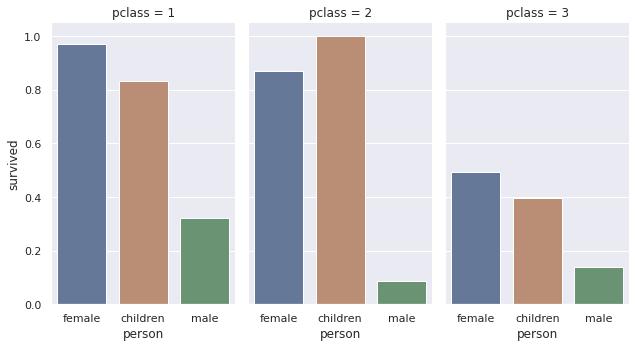

In [211]:
# Célula 2
g = sns.catplot(x="person", y="survived", col="pclass",
                data=df_titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)


In [213]:
# Célula 3
print('A maior probabilidade de sobrevivência está assossiada a mulheres e crianças das primeira e segunda classe.')


a maior probabilidade de sobrevivência está assossiada a mulheres e crianças das primeira e segunda classe.


In [ ]:
# Célula 4